In [1]:
from tensorflow.keras import models
model = models.load_model("dogs_vs_cats.model")

In [3]:
import pickle
x_test = pickle.load(open("dog_vs_cat_data/x_test.pickle", "rb"))
y_test = pickle.load(open("dog_vs_cat_data/y_test.pickle", "rb"))
x_test = x_test/255
model.evaluate(x_test, y_test)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24959499340057373, 0.9148]

In [4]:
import matplotlib.pyplot as plt

def imshow(image):
    sample = image.reshape(80,80)
    plt.imshow(sample)
    plt.show()

In [5]:
predictions = model.predict([x_test])

In [6]:
def compare(index):
    try: 
        prediction = "a dog" if predictions[index] <= 0.5 else "a cat"
        fact = "a dog" if y_test[index] == 0 else "a cat"
        print("prediction : " + prediction)
        print("fact : " + fact)
        imshow(x_test[index] * 255)
    except Exception as e:
        print(e)

prediction : a dog
fact : a dog


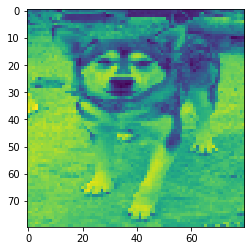

In [16]:
compare(564)

## Test images from google

In [71]:
import cv2

def test_image(image_path):
    origin = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    plt.imshow(origin)
    plt.show()
    IMG_SIZE = 80
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    resize_array = resize_array.reshape(-1, 80,80, 1)
    resize_array = resize_array/255
    prediction = model.predict(resize_array)
    pet = "a dog" if prediction[0] <=0.5 else "a cat"
    return pet

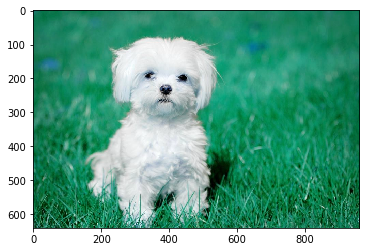

'a dog'

In [72]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/writedog.jpg")

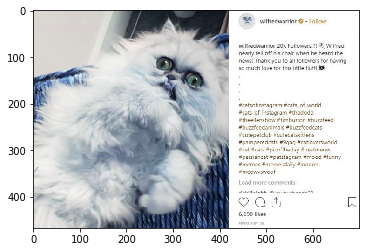

'a cat'

In [73]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/fatcat.jpg")

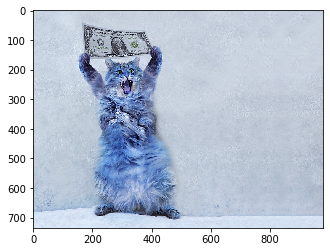

'a cat'

In [74]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/angrycat.jpg")

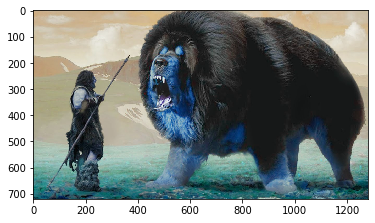

'a dog'

In [75]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/bigdog.jpg")

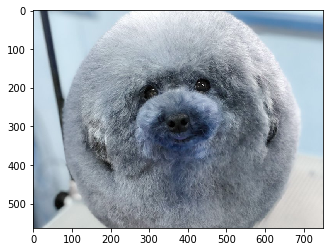

'a cat'

In [77]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/rounddog.jpg")

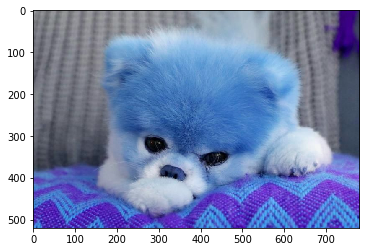

'a dog'

In [78]:
test_image("/Users/zmn/Documents/dogs_vs_cats/web_images/littledog.jpg")